In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df_train= pd.read_csv('data/train.csv')

In [3]:
df_test = pd.read_csv('data/test.csv')

In [40]:
one_hot_enc = pd.get_dummies(df_train)
one_hot_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 290 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(35), uint8(252)
memory usage: 792.8 KB


In [5]:
df_all = pd.concat([df_train, df_test], sort=False)

In [6]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

In [7]:
cols_with_missing = [col for col in df_all.columns
                     if df_all[col].isnull().any()]

In [8]:
df_all[cols_with_missing].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 35 columns):
MSZoning        2915 non-null object
LotFrontage     2433 non-null float64
Alley           198 non-null object
Utilities       2917 non-null object
Exterior1st     2918 non-null object
Exterior2nd     2918 non-null object
MasVnrType      2895 non-null object
MasVnrArea      2896 non-null float64
BsmtQual        2838 non-null object
BsmtCond        2837 non-null object
BsmtExposure    2837 non-null object
BsmtFinType1    2840 non-null object
BsmtFinSF1      2918 non-null float64
BsmtFinType2    2839 non-null object
BsmtFinSF2      2918 non-null float64
BsmtUnfSF       2918 non-null float64
TotalBsmtSF     2918 non-null float64
Electrical      2918 non-null object
BsmtFullBath    2917 non-null float64
BsmtHalfBath    2917 non-null float64
KitchenQual     2918 non-null object
Functional      2917 non-null object
FireplaceQu     1499 non-null object
GarageType      2762 non-null objec

In [41]:
def feature_engineering2(data):
  #  non_numeric = data.select_dtypes(include=object).columns.tolist()
   # categorize_cols(data, non_numeric)
    one_hot_encoding = pd.get_dummies(data)
    return one_hot_encoding

In [10]:
def heal_cols(data,cols):
    for col in cols:
        data[col].fillna(value=int(data[col].mean()), inplace=True)
    

In [11]:
def feature_engineering(data):
    data['Neighborhood_cat'] = pd.factorize(data.Neighborhood)[0]
    data['LotShape_cat'] = pd.factorize(data.LotShape)[0]
    data['BldgType_cat'] = pd.factorize(data.BldgType)[0]
    data['HouseStyle_cat'] = pd.factorize(data.HouseStyle)[0]
    data['MSZoning_cat'] = pd.factorize(data.MSZoning)[0]
    

In [12]:
def choose_cols(data):
    black_list = ['Id', 'SalePrice']
    choosen_cols = data.select_dtypes(include=np.number).columns.tolist()
    for col in choosen_cols:
        if col in black_list:
            choosen_cols.remove(col)
    return choosen_cols

In [13]:
def categorize_cols(data, columns):
    for col in columns:
        data[col+"_cat"] = pd.factorize(data[col])[0]
    return

In [14]:
sub_train = pd.read_csv("data/train.csv")

In [15]:
feature_engineering2(sub_train)
choosen_cols = choose_cols(sub_train)
print(choosen_cols)
print(len(choosen_cols))
heal_cols(sub_train, choosen_cols)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_cat', 'Street_cat', 'Alley_cat', 'LotShape_cat', 'LandContour_cat', 'Utilities_cat', 'LotConfig_cat', 'LandSlope_cat', 'Neighborhood_cat', 'Condition1_cat', 'Condition2_cat', 'BldgType_cat', 'HouseStyle_cat', 'RoofStyle_cat', 'RoofMatl_cat', 'Exterior1st_cat', 'Exterior2nd_cat', 'MasVnrType_cat', 'ExterQual_cat', 'ExterCond_cat', 'Foundation_cat', 'BsmtQual_cat', 'BsmtCond_cat', 'BsmtExposure_cat', 'BsmtFinType1_cat', 'BsmtFinType2_cat', 'Heating_cat', 'HeatingQC_cat', 'CentralAir_cat

In [16]:
sub_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 124 entries, Id to SaleCondition_cat
dtypes: float64(3), int64(78), object(43)
memory usage: 1.4+ MB


In [17]:
def mae(model, trX, valX, trY, valY):
    model.fit(trX,trY)
    #print(max(model.feature_importances_))
    predictionTest = model.predict(valX)
    predictionTrain = model.predict(trX)
    return mean_absolute_error(valY, predictionTest), mean_absolute_error(trY,predictionTrain)

In [18]:
def mse(model, trX, valX, trY, valY):
    model.fit(trX,trY)
    predictionTest = model.predict(valX)
    predictionTrain = model.predict(trX)
    return rmsle(valY, predictionTest), rmsle(trY,predictionTrain)
    

In [19]:
def rmsle(y_test, y_pred) : 
    assert len(y_test) == len(y_pred)
    return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y_test))**2))

In [20]:
X = sub_train[choosen_cols]

In [21]:
y = sub_train['SalePrice']

In [22]:
def test_f(max_leaf_nodes):
    test_model = RandomForestRegressor(n_estimators=max_leaf, max_leaf_nodes =max_leaf_nodes , random_state=42)
    test_model.fit(X_train, y_train)
    prediction = test_model.predict(X_test)
    prediction2 = test_model.predict(X_train)
    print(rmsle(y_test, prediction))
    print(rmsle(y_train, prediction2))
    return rmsle(y_test, prediction), rmsle(y_train, prediction2)


In [23]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

0.15566607510887231
0.1115152429576041
test result is 0
0.14532446909723026
0.07053386158519079
test result is 0
0.14567430527731723
0.061764576042703655
test result is 0
0.1453857860306746
0.060535870987616425
test result is 0
0.14565983484011522
0.06071280158024161
test result is 0


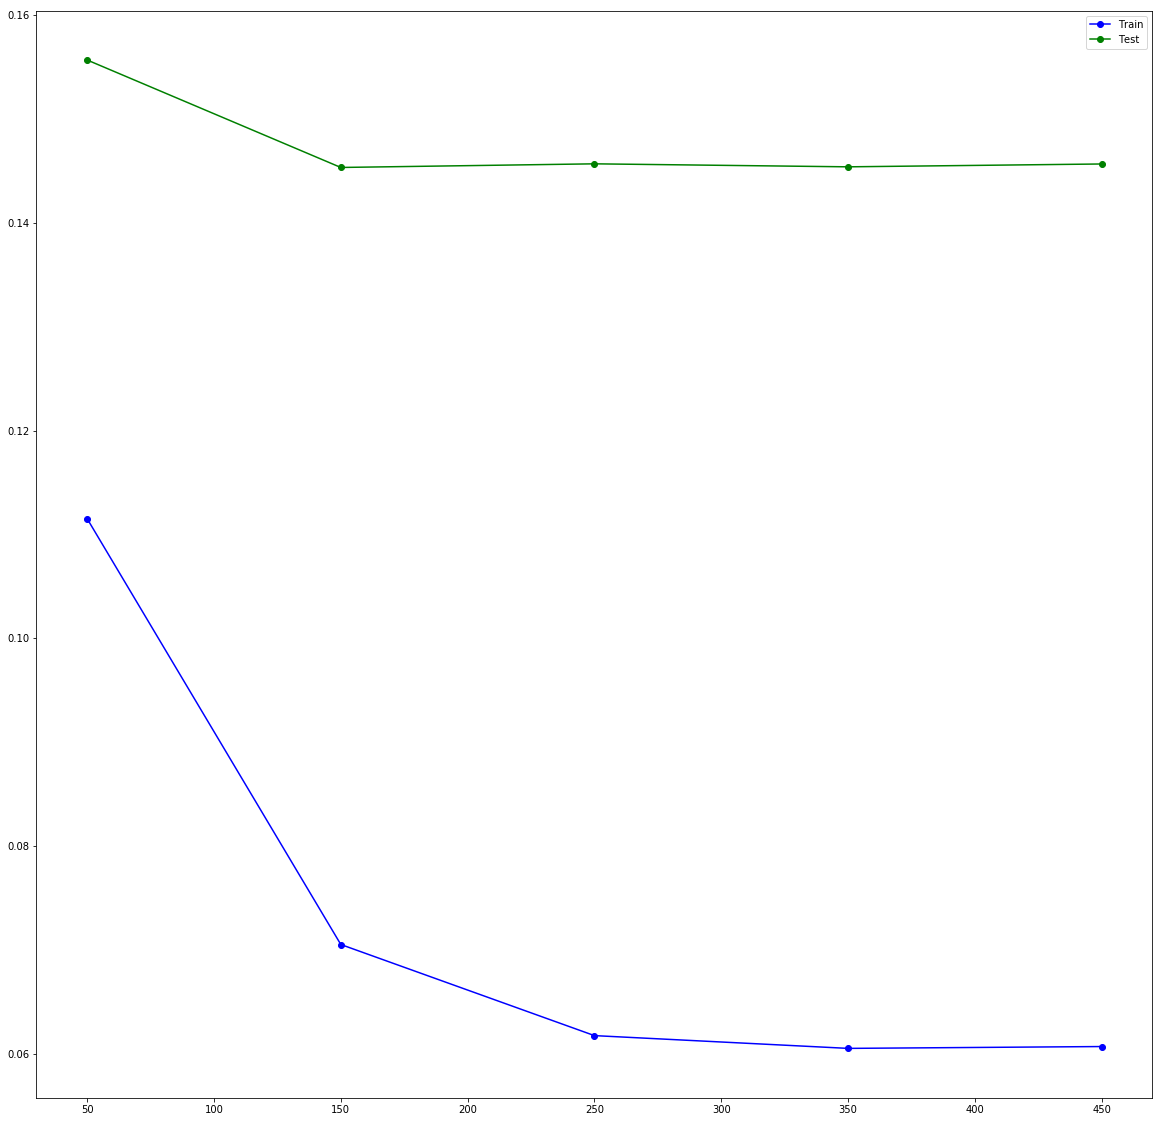

0.14532446909723026
best max_leaf is 150


In [24]:
import math

train_result = list()
test_result = list()
leafs = list()
min_test = math.inf
best_leaf = 5007
for max_leaf in range(50,500,100):
    model = RandomForestRegressor(n_estimators=max_leaf, max_leaf_nodes= 3050, n_jobs=-1)
    test, train = test_f(max_leaf)
   # test , train = test(model,X_train, X_test, y_train, y_test)
    print('test result is %d' %(test))
    train_result.append(train)
    test_result.append(test)
    min_test = min(min_test, test)
    if min_test == test:
        best_leaf = max_leaf
    leafs.append(max_leaf)
plt.figure(figsize=(20,20))
plt.plot(leafs, train_result, 'bo-', label='Train')
plt.plot(leafs, test_result, 'go-', label='Test')
plt.legend(loc='best')
plt.show()
print(min_test)
print('best max_leaf is %d'%(best_leaf))

In [25]:
important_cols = list()

In [26]:
important_cols

[]

In [27]:
df1 = pd.DataFrame({'col1':['2','2','5','adf'],'col2':[2,4,5,6]})
df2 = pd.DataFrame({'col2':[5,3,6,2,1,563,2]})
df3 = pd.concat([df1, df2], sort=False)
df3
cond = df3.col1.notna()
get_df1 = df3[cond]
get_df1

,col1,col2
0,2,2
1,2,4
2,5,5
3,adf,6


In [42]:
def make_prediction( model, data_all):
    data_all = feature_engineering2(data_all)
  #  choosen_cols = important_cols
    choosen_cols = choose_cols(data_all)
    heal_cols(data_all, choosen_cols)
    print(choosen_cols)
  #  heal_cols(test_data, choosen_cols)
   # heal_cols(train_data, choosen_cols)
    test_data = data_all[data_all.SalePrice.isnull()]
    train_data = data_all[data_all.SalePrice.notna()]
    test_X = test_data[choosen_cols]
    train_X = train_data[choosen_cols]
    train_y = train_data['SalePrice']
    model.fit(train_X, train_y)
    print(model.feature_importances_)
    feature_importances = pd.DataFrame(model.feature_importances_, index = choosen_cols, columns=['importance']).sort_values('importance', ascending=False)
    important_cols = feature_importances.index.tolist()[:11]
    print(important_cols)
    print(feature_importances)
#   for i in range(0,len(model.feature_importances_)):
  #      print('feature name %s \t\t feature importance %d'%(choosen_cols[i], np.round(model.feature_importances_[i],3)))
    prediction = model.predict(test_X)
    solution = pd.DataFrame({'Id':test_data.Id, 'SalePrice':prediction})
    solution.to_csv('output/solution_more_cols_one_hot_encoding.csv', index=False)
    return 

In [43]:
model = RandomForestRegressor(n_estimators = 110, max_leaf_nodes=3050, n_jobs=-1, random_state = 0)
important_cols = make_prediction(model, df_all)


['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_cat', 'Street_cat', 'Alley_cat', 'LotShape_cat', 'LandContour_cat', 'Utilities_cat', 'LotConfig_cat', 'LandSlope_cat', 'Neighborhood_cat', 'Condition1_cat', 'Condition2_cat', 'BldgType_cat', 'HouseStyle_cat', 'RoofStyle_cat', 'RoofMatl_cat', 'Exterior1st_cat', 'Exterior2nd_cat', 'MasVnrType_cat', 'ExterQual_cat', 'ExterCond_cat', 'Foundation_cat', 'BsmtQual_cat', 'BsmtCond_cat', 'BsmtExposure_cat', 'BsmtFinType1_cat', 'BsmtFinType2_cat', 'Heating_cat', 'HeatingQC_cat', 'CentralAir_cat

In [30]:
grouped_data = avg_price_data.groupby('YearBuilt').mean()

NameError: name 'avg_price_data' is not defined

In [ ]:
grouped_data.sort_values('YearBuilt', inplace=True)
grouped_data.head()

In [ ]:
grouped_data.plot();